In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import scaleogram as scg 
import pywt

# choose default wavelet function for the entire notebook
scg.set_default_wavelet('cmor1-1.5')

## Data

In [2]:
df=pd.read_csv('data/Kirumpaa.csv', sep=';', header=None)
df.columns=['date', 'veetase']
df=df.set_index('date')
df.shape

(4383, 1)

In [3]:
df.head()

,veetase
date,
01.01.2011,79
02.01.2011,79
03.01.2011,78
04.01.2011,77
05.01.2011,76


In [4]:
df.tail()

,veetase
date,
27.12.2022,58
28.12.2022,54
29.12.2022,52
30.12.2022,53
31.12.2022,57


## Norm data

In [5]:
veetase = df.veetase-df.veetase.mean()

## Plot

<Axes: xlabel='date'>

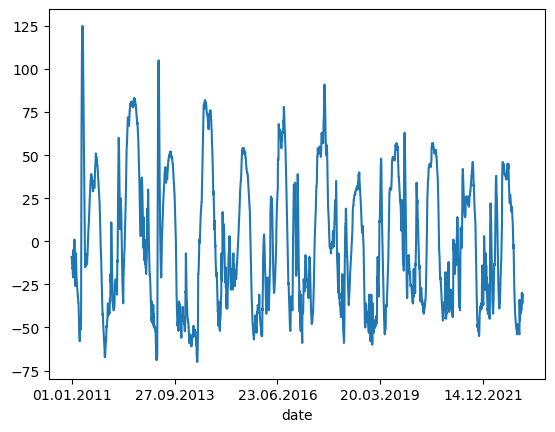

In [6]:
veetase.plot()

<Axes: xlabel='date'>

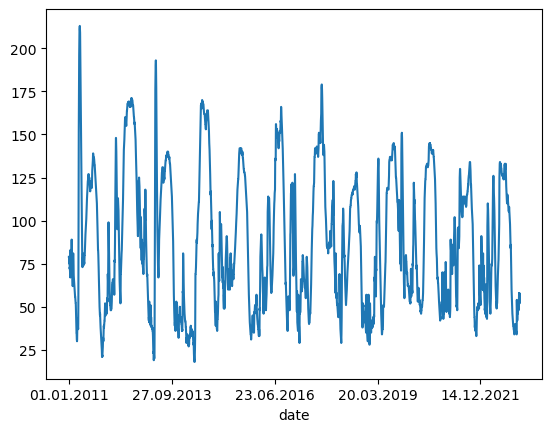

In [7]:
df.veetase.plot()

In [8]:
def set_x_yearly(ax, days, start_year=2011, step=1):
    xlim  = (np.round([0, days]) / 365).astype(np.int32)
    ticks = np.arange(xlim[0], xlim[1], step)
    ax.set_xticks(ticks*365)
    ax.set_xticklabels(start_year + ticks)

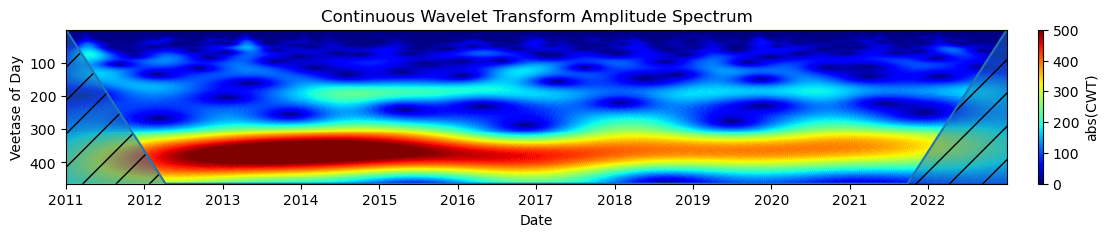

In [9]:
scales = scg.periods2scales(np.arange(1, 365+100, 3))
ax = scg.cws(veetase, figsize=(13.2, 2), scales=scales,
             xlabel="Date", ylabel="Veetase of Day",coikw={'alpha':0.5,'hatch':'/'}, clim=(0, 500))
set_x_yearly(ax, len(veetase))

## Räpina vaatlusjaam

In [10]:
df_rapina=pd.read_csv('data/Rapina.csv', sep=';')
df_rapina.shape

(35972, 2)

In [11]:
df_rapina.head()

,Date,Value[cm]
0,07.07.1924,90
1,08.07.1924,93
2,09.07.1924,91
3,10.07.1924,90
4,11.07.1924,87


In [12]:
df_rapina.tail()

,Date,Value[cm]
35967,27.12.2022,7
35968,28.12.2022,8
35969,29.12.2022,2
35970,30.12.2022,9
35971,31.12.2022,3


In [13]:
df_rapina=df_rapina.set_index('Date')
# df_rapina=df_rapina.head(5000)

In [14]:
df_rapina['veetase']=df_rapina['Value[cm]'].replace({'---':np.nan})
df_rapina['veetase']=df_rapina.veetase.fillna(method='ffill').astype(int)

In [15]:
df_rapina['veetase'].astype(int)

Date
07.07.1924    90
08.07.1924    93
09.07.1924    91
10.07.1924    90
11.07.1924    87
              ..
27.12.2022     7
28.12.2022     8
29.12.2022     2
30.12.2022     9
31.12.2022     3
Name: veetase, Length: 35972, dtype: int32

In [16]:
veetase_rapina = df_rapina.veetase-df_rapina.veetase.mean()

<Axes: xlabel='Date'>

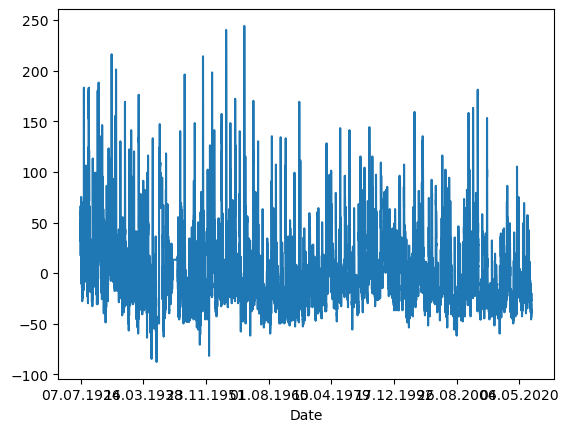

In [17]:
veetase_rapina.plot()

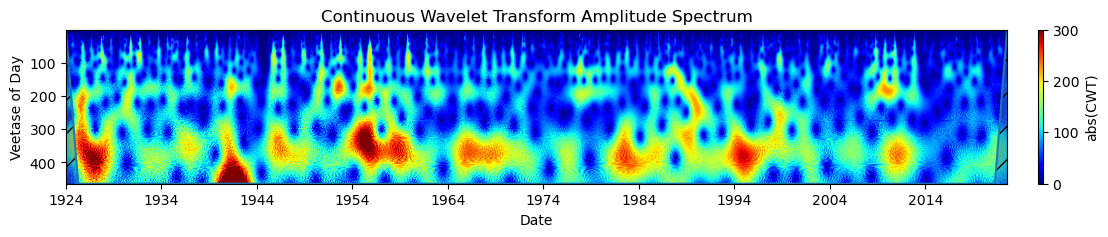

In [18]:
scales = scg.periods2scales(np.arange(1, 365+100, 3))
ax = scg.cws(veetase_rapina, figsize=(13.2, 2), scales=scales,
             xlabel="Date", ylabel="Veetase of Day",coikw={'alpha':0.5,'hatch':'/'},
            clim=(0, 300))
set_x_yearly(ax, len(veetase_rapina), start_year=1924, step=10)

## Vooluhulk Räpina

In [30]:
text=Path('data/vooluhulk_Rapina.csv').read_text()

In [32]:
lines=text.split('\n')

In [33]:
len(lines)

23470

In [45]:
lines_split=[l.replace(',','.').split(';') for l in lines]

In [46]:
df_vool_r=pd.DataFrame(lines_split[1:])
df_vool_r.columns=['date', 'vooluhulk']
df_vool_r.shape

(23469, 2)

In [47]:
df_vool_r.head()

,date,vooluhulk
0,01.10.1958,4.70
1,02.10.1958,4.50
2,03.10.1958,4.50
3,04.10.1958,4.50
4,05.10.1958,4.50


In [53]:
df_vool_r['vooluhulk']=df_vool_r.vooluhulk.ffill().astype(float)

In [54]:
df_vool_r['vooluhulk'].describe()

count    23469.000000
mean         8.109738
std          5.442288
min          0.260000
25%          4.560000
50%          6.430000
75%          9.860000
max         93.000000
Name: vooluhulk, dtype: float64

<Axes: >

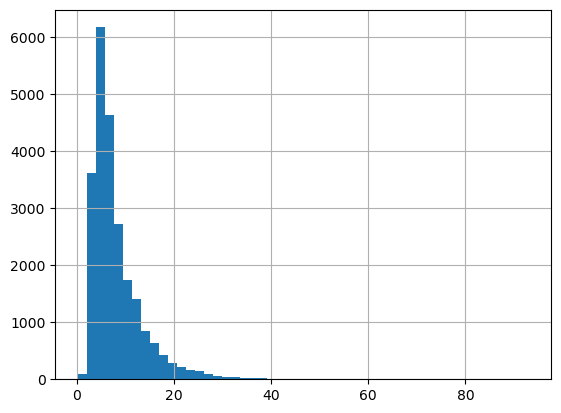

In [56]:
df_vool_r['vooluhulk'].hist(bins=50)

In [57]:
vool_r = df_vool_r.vooluhulk-df_vool_r.vooluhulk.mean()

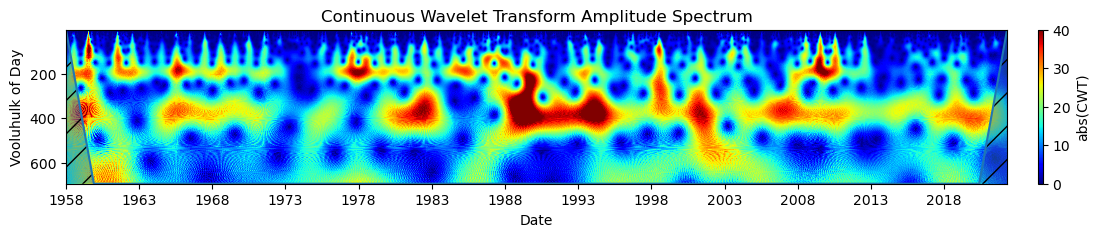

In [66]:
scales = scg.periods2scales(np.arange(1, 365+100, 3))
ax = scg.cws(vool_r, figsize=(13.2, 2), scales=scales, wavelet='cmor1.5-1.0',
             xlabel="Date", ylabel="Vooluhulk of Day",coikw={'alpha':0.5,'hatch':'/'},
            clim=(0, 40))
set_x_yearly(ax, len(vool_r), start_year=1958, step=5)

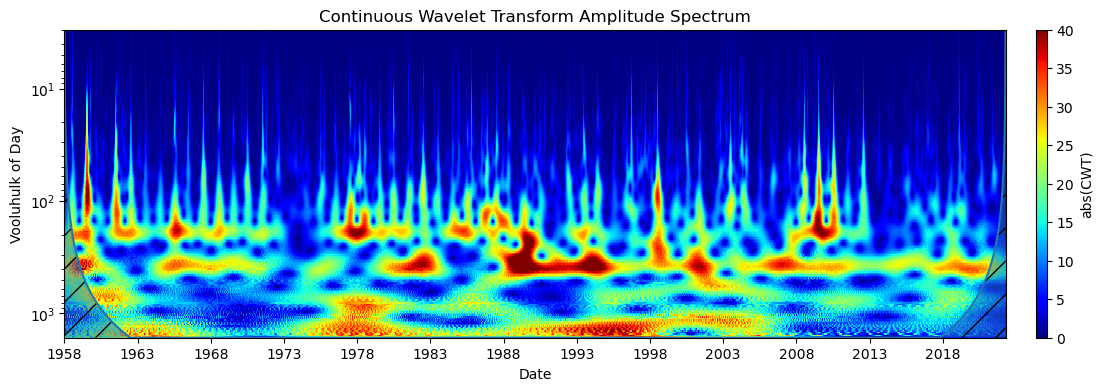

In [68]:
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*3), 200))

cwt = scg.CWT(vool_r, scales=scales, wavelet='cmor1.5-1.0') 

ax  = scg.cws(cwt, figsize=(13.2, 4), xlabel="Date", ylabel="Vooluhulk of Day", 
              yscale='log', coikw={'alpha':0.5,'hatch':'/'},  clim=(0, 40))
set_x_yearly(ax, len(vool_r),  start_year=1958, step=5)